<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

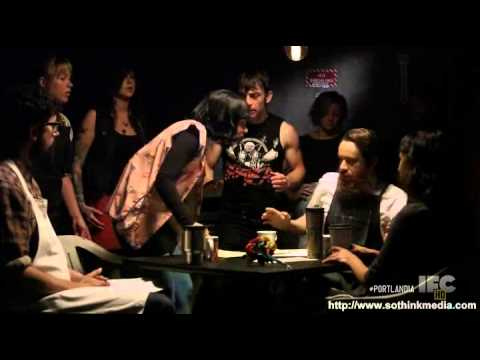

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\Ben\\Lambda\\unit4\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [96]:
# First things first: drop words from star rating and make int

def clean_stars(rating):
    return int(rating[1])

shops['star_rating'] = shops['star_rating'].apply(clean_stars)

In [5]:
pd.set_option('display.max_colwidth', 0)
shops.sample(20)

,coffee_shop_name,full_review_text,star_rating
1640,Summer Moon Coffee Bar,"6/15/2015 1 check-in I love coming here every time I'm in Austin. The coffee is amazing of course but even their breakfast burritos were great. For coffee I typically get the Moonraker or wintermoon. Both are the perfect cold drink and that moon milk...like liquid crack. I also like their ground coffee and use it for home brewing because the flavor a are not harsh like other coffees The breakfast burrito I had was the bacon and cactus burrito, which I was hesitant about, but it was perfect. The cactus was like a bell pepper so it wasn't too crazy. This is just an amazing coffee shop in a very unassuming location, but to pass it up would be a shame. Amazing wood fired coffee",5.0 star rating
949,Venezia Italian Gelato,"7/30/2016 1 check-in I had a small sized gelato, half cherry and half pistachio. Gelato was nice and smooth. Pistachio tasted like real pistachios, just as it should and was not overly sweet. It was very good. The cherry was lovely. Again, not too sweet and a bit of tartness from the pieces of cherry. It also had a sort of jelly/jam like topping as they scoop it, which had a slight tart/sourness to it. I sampled the cheesecake and passion fruit, both were delicious. Small size is perfect because the gelato is rich and flavourful. Very friendly service and the pricing is right. I'd much rather pay $4 for a delicious gelato here, than $7-8 for gimmicky ice cream you can get at other places. I'll be back!",5.0 star rating
6182,Stinson’s,9/6/2015 We just found a little jewel! I've always stopped for coffee but never realized how cute the dining area was! I needed something central for a bridal shower and this place was perfect! The Manager was so easy to work with and the staff was stellar! I'm a picky Bloody Mary girl and I gotta say it was so good!! We also enjoyed sangria & mimosas and our guest all had smiles! Thank you Stinsons!!!! Perfect for a girls get together!! Great drinks & yummy food!!,5.0 star rating
3626,Cenote,"8/18/2016 I am more so reviewing the place in it's entirety. The food isn't great but it's better than expected for coffeeshop food. But the atmosphere and the darling outdoor seating on the front porch is what brings me back. There is a good amount of indoor seating and a ton outdoor. It's a great place to come early on a weekend morning (not past 10, it gets crazy busy), have good coffee, and enjoy the weather. Also a great place to grab a drink with a friend (less busy at night) and sit on the porch -- I did this recently when it was raining, and it was beautiful.",5.0 star rating
6989,My Sweet Austin,11/17/2015 Red velvet cupcake was amazing! and the chocolate chip cookies are always a good choice. Great place to stop in for something sweet if you're in west campus!,5.0 star rating
2205,Flat Track Coffee,7/26/2014 AWESOME coffee. The space is small with limited seating but the barista was friendly (and had a slowerblack tattoo -- legit!). Excellent cold brew. Cold brew growlers available for $26!,5.0 star rating
610,Apanas Coffee & Beer,"4/13/2016 I have struggled to find good coffee around where I stay, which is 25 min North of downtown. Life is really hard without access to good coffee, especially that I sometimes work from home. All the highly rated cafes around my place were all disappointments. Guess suburb population tends to appreciate yummy sugary coffee flavored milkshake way more than real coffee. In Austin, Houndstooth was my favorite , but a bit far from mine and it's N. Lamar location does not have enough tables for work. I am so please to find Two Hands, and now I go there every weekend for work, even though it still takes me 15 minutes to get there. The coffee is spot on. The cappuccino and expresso macchiato are both well made, with the right temperature and good quality beans, allowing the expresso taste shine through the foaming milk. Nice staff. Yummy pastry. (Macaroon is my fav! Ask them to heat 

Visual analysis suggests dates at beginning of review and extra words in star rating are consistent data bugs, but that there probably aren't many others.

I'd like to see how many distinct coffee shops are rated, and make sure names are consistently rendered...

In [ ]:
pd.set_option('display.max_rows', 1000)
shops['coffee_shop_name'].value_counts()

Well, there don't appear to be any conspicuously similar shop names, anyway. 

The dates I can strip using python string slicing. These could be featurized. It might be interesting to see how ratings and language correlate with seasons.

I'm not totally sure what to do about the "1 check-in" that precedes some reviews. Might be worth looking into removing those, or even featurizing them.

Let's use the function from class to tokenize these reviews.

In [51]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    
    # Remove date from list of tokens
    tokens = tokens[1:]
    
    return tokens

In [48]:
import re
shops['review_tokens'] = shops['full_review_text'].apply(tokenize)

In [49]:
shops['review_tokens']

0       [1, checkin, love, love, loved, the, atmosphere, every, corner, of, the, coffee, shop, had, its, own, style, and, there, were, swings, i, ordered, the, matcha, latte, and, it, was, muy, fantastico, ordering, and, getting, my, drink, were, pretty, streamlined, i, ordered, on, an, ipad, which, included, all, beverage, selections, that, ranged, from, coffee, to, wine, desired, level, of, sweetness, and, a, checkout, system, i, got, my, latte, within, minutes, i, was, hoping, for, a, typical, heart, or, feather, on, my, latte, but, found, myself, listing, out, all, the, possibilities, of, what, the, art, may, be, any, ideas]                              
1       [listed, in, date, night, austin, ambiance, in, austin, beautiful, love, the, ambiance, instagramworthy, definitely, so, be, prepared, this, is, gonna, cost, you, a, pretty, penny, waffle, dessert, was, just, decentnothing, to, rave, about, but, will, probably, be, back, just, to, be, somewhere, unique, and, nice]          

In [58]:
from collections import Counter

# And the function from class to count the words...

def count(docs):

    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [60]:
wc = count(shops['review_tokens'])

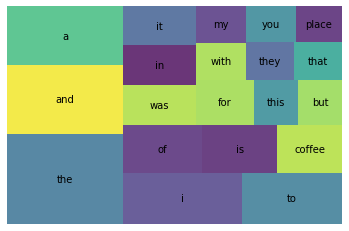

In [62]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

Use Spacy to tokenize and remove stop words from tokens

In [64]:
import spacy

nlp = spacy.load("en_core_web_lg")

In [67]:
from spacy.tokenizer import Tokenizer

tokenizer = Tokenizer(nlp.vocab)

In [69]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_tokens
0,The Factory - Cafe With a Soul,"11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes! I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas?",5.0 star rating,"[1, checkin, love, love, loved, the, atmosphere, every, corner, of, the, coffee, shop, had, its, own, style, and, there, were, swings, i, ordered, the, matcha, latte, and, it, was, muy, fantastico, ordering, and, getting, my, drink, were, pretty, streamlined, i, ordered, on, an, ipad, which, included, all, beverage, selections, that, ranged, from, coffee, to, wine, desired, level, of, sweetness, and, a, checkout, system, i, got, my, latte, within, minutes, i, was, hoping, for, a, typical, heart, or, feather, on, my, latte, but, found, myself, listing, out, all, the, possibilities, of, what, the, art, may, be, any, ideas]"
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambiance in Austin BEAUTIFUL!!!! Love the ambiance! Instagram-worthy!!! Definitely $$$, so be prepared. This is gonna cost you a pretty penny :) Waffle dessert was just decent...nothing to rave about. But, will probably be back just to be somewhere unique and nice.",4.0 star rating,"[listed, in, date, night, austin, ambiance, in, austin, beautiful, love, the, ambiance, instagramworthy, definitely, so, be, prepared, this, is, gonna, cost, you, a, pretty, penny, waffle, dessert, was, just, decentnothing, to, rave, about, but, will, probably, be, back, just, to, be, somewhere, unique, and, nice]"
2,The Factory - Cafe With a Soul,"11/30/2016 1 check-in Listed in Brunch Spots I loved the eclectic and homey plush decor and who doesn't want to swing and drink their coffee? I would categorize this as a pricier coffee place but, to me it was worth it. After Thanksgiving nobody wants to make brunch so we headed out in search of chicken and waffles. There is ample parking in the private lot and ordering is done through I-Pads. Pick a seat and they will call your name when your items are ready. Be patient because some of the coffee drinks take longer than others. I had the cold brew coffee, chicken and waffles and we shared a pop+art! The po+art was strawberry; light and fluffy on the outside and gooey sweet filling on the inside. The chicken and waffles wasn't the standard so expect different, complex and interesting flavors from the accompanying slaw and sauce. I thoroughly enjoyed it but, the waffle was a bit bland and maybe could have used a bit of honey to spruce it up. The coffee here is spot on and I hear that their hot chocolate is the bomb but, I will have to wait for the weather to cool off to try that. A great place to be cozy and chat with your friends, a date or read a book. Chicken and waffles Pop tart Coffee See all photos from Carmela S. for The Factory - Cafe With a Soul",4.0 star rating,"[1, checkin, listed, in, brunch, spots, i, loved, the, eclectic, and, homey, plush, decor, and, who, doesnt, want, to, swing, and, drink, their, coffee, i, would, categorize, this, as, a, pricier, coffee, place, but, to, me, it, was, worth, it, after, thanksgiving, nobody, wants, to, make, brunch, so, we, headed, out, in, search, of, chicken, and, waffles, there, is, ample, parking, in, the, private, lot, and, ordering, is, done, through, ipads, pick, a, seat, and, they, will, call, your, name, when, your, items, are, ready, be, patient, because, some, of, the, coffee, drinks, take, longer, than, others, i, had, the, ...]"
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good 

In [122]:
STOP_WORDS = nlp.Defaults.stop_words.union([' ', 'coffee', 'place', 'great', "it's", 'like', 'good', '1', 'check-in'])

In [123]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = []
    
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
            
    doc_tokens = doc_tokens[2:]        
    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [124]:
# Okay, here's the properly tokenized list:

In [125]:
shops['tokens']

0       [love, loved, atmosphere!, corner, shop, style,, swings!!!, ordered, matcha, latte,, muy, fantastico!, ordering, getting, drink, pretty, streamlined., ordered, ipad,, included, beverage, selections, ranged, wine,, desired, level, sweetness,, checkout, system., got, latte, minutes!, hoping, typical, heart, feather, latte,, found, listing, possibilities, art, be., ideas?]                                                                                                                                                                                                                                                                                                                                                                                                                                         
1       [date, night:, austin,, ambiance, austin, beautiful!!!!, love, ambiance!, instagram-worthy!!!, definitely, $$$,, prepared., gonna, cost, pretty, penny, waffle, dessert, decent...nothing,

In [130]:
# Let's take a look at a graph...

wc = count(shops['tokens'])
wc

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
296,i'm,1321,1708,1.0,0.004803,0.004803,0.173451
29,love,1197,1490,2.0,0.004190,0.008993,0.157169
783,little,1208,1450,3.0,0.004077,0.013070,0.158613
321,i've,1084,1368,4.0,0.003847,0.016917,0.142332
345,don't,1099,1349,5.0,0.003793,0.020711,0.144301
...,...,...,...,...,...,...,...
38612,actuality.,1,1,38614.0,0.000003,0.999989,0.000131
38611,crass.,1,1,38615.0,0.000003,0.999992,0.000131
38614,restrictions.,1,1,38616.0,0.000003,0.999994,0.000131
38616,"specially,",1,1,38617.0,0.000003,0.999997,0.000131


In [131]:
wc.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
296,i'm,1321,1708,1.0,0.004803,0.004803,0.173451
29,love,1197,1490,2.0,0.004190,0.008993,0.157169
783,little,1208,1450,3.0,0.004077,0.013070,0.158613
321,i've,1084,1368,4.0,0.003847,0.016917,0.142332
345,don't,1099,1349,5.0,0.003793,0.020711,0.144301
435,food,1068,1334,6.0,0.003751,0.024462,0.140231
627,time,1068,1303,7.0,0.003664,0.028126,0.140231
37,pretty,1023,1284,8.0,0.003611,0.031737,0.134322
160,nice,1121,1283,9.0,0.003608,0.035344,0.147190
928,people,1010,1218,10.0,0.003425,0.038769,0.132616


In [132]:
shops['star_rating'].value_counts()

5    3780
4    2360
3    738 
2    460 
1    278 
Name: star_rating, dtype: int64

In [133]:
shops[shops['star_rating'] >= 4]

,coffee_shop_name,full_review_text,star_rating,review_tokens,tokens
0,The Factory - Cafe With a Soul,"11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes! I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas?",5,"[1, checkin, love, love, loved, the, atmosphere, every, corner, of, the, coffee, shop, had, its, own, style, and, there, were, swings, i, ordered, the, matcha, latte, and, it, was, muy, fantastico, ordering, and, getting, my, drink, were, pretty, streamlined, i, ordered, on, an, ipad, which, included, all, beverage, selections, that, ranged, from, coffee, to, wine, desired, level, of, sweetness, and, a, checkout, system, i, got, my, latte, within, minutes, i, was, hoping, for, a, typical, heart, or, feather, on, my, latte, but, found, myself, listing, out, all, the, possibilities, of, what, the, art, may, be, any, ideas]","[love, loved, atmosphere!, corner, shop, style,, swings!!!, ordered, matcha, latte,, muy, fantastico!, ordering, getting, drink, pretty, streamlined., ordered, ipad,, included, beverage, selections, ranged, wine,, desired, level, sweetness,, checkout, system., got, latte, minutes!, hoping, typical, heart, feather, latte,, found, listing, possibilities, art, be., ideas?]"
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambiance in Austin BEAUTIFUL!!!! Love the ambiance! Instagram-worthy!!! Definitely $$$, so be prepared. This is gonna cost you a pretty penny :) Waffle dessert was just decent...nothing to rave about. But, will probably be back just to be somewhere unique and nice.",4,"[listed, in, date, night, austin, ambiance, in, austin, beautiful, love, the, ambiance, instagramworthy, definitely, so, be, prepared, this, is, gonna, cost, you, a, pretty, penny, waffle, dessert, was, just, decentnothing, to, rave, about, but, will, probably, be, back, just, to, be, somewhere, unique, and, nice]","[date, night:, austin,, ambiance, austin, beautiful!!!!, love, ambiance!, instagram-worthy!!!, definitely, $$$,, prepared., gonna, cost, pretty, penny, waffle, dessert, decent...nothing, rave, about., but,, probably, unique, nice.]"
2,The Factory - Cafe With a Soul,"11/30/2016 1 check-in Listed in Brunch Spots I loved the eclectic and homey plush decor and who doesn't want to swing and drink their coffee? I would categorize this as a pricier coffee place but, to me it was worth it. After Thanksgiving nobody wants to make brunch so we headed out in search of chicken and waffles. There is ample parking in the private lot and ordering is done through I-Pads. Pick a seat and they will call your name when your items are ready. Be patient because some of the coffee drinks take longer than others. I had the cold brew coffee, chicken and waffles and we shared a pop+art! The po+art was strawberry; light and fluffy on the outside and gooey sweet filling on the inside. The chicken and waffles wasn't the standard so expect different, complex and interesting flavors from the accompanying slaw and sauce. I thoroughly enjoyed it but, the waffle was a bit bland and maybe could have used a bit of honey to spruce it up. The coffee here is spot on and I hear that their hot chocolate is the bomb but, I will have to wait for the weather to cool off to try that. A great place to be cozy and chat with your friends, a date or read a book. Chicken and waffles Pop tart Coffee See all photos from Carmela S. for The Factory - Cafe With a Soul",4,"[1, checkin, listed, in, brunch, spots, i, loved, the, eclectic, and, homey, plush, decor, and, who, doesnt, want, to, swin

In [138]:
wc_good = count(shops[shops['star_rating'] >= 4]['tokens'])
wc_less_good = count(shops[shops['star_rating'] < 4]['tokens'])

In [140]:
wc_good

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
29,love,1051,1317,1.0,0.004772,0.004772,0.171173
268,i'm,1036,1315,2.0,0.004765,0.009537,0.168730
597,little,1005,1203,3.0,0.004359,0.013896,0.163681
293,i've,867,1089,4.0,0.003946,0.017842,0.141205
209,nice,911,1035,5.0,0.003750,0.021592,0.148371
...,...,...,...,...,...,...,...
32638,actuality.,1,1,32640.0,0.000004,0.999986,0.000163
32637,crass.,1,1,32641.0,0.000004,0.999989,0.000163
32640,restrictions.,1,1,32642.0,0.000004,0.999993,0.000163
32642,"specially,",1,1,32643.0,0.000004,0.999996,0.000163


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

